In [1]:
import numpy as np
from scipy.spatial import distance_matrix
from sklearn.datasets import make_moons

from location_allocation import MaximizeCoverageMinimizeCost
import utils

### Generate Dummy Data & Optimize

In [2]:
points, _ = make_moons(300, noise=0.15)
facilities = utils.generate_candidate_facilities(points, 50)
capacities = utils.generate_facility_capacities(facilities.shape[0])

cost_matrix = distance_matrix(points, facilities)

mcmclp = MaximizeCoverageMinimizeCost(
    points,
    facilities,
    cost_matrix,
    cost_cutoff=0.2,
    facilities_to_site=3,
    max_gap=0.1,
)
mcmclp.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Nov 15 2020 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 393 (-14783) rows, 590 (-14762) columns and 2117 (-73483) elements
Clp1000I sum of infeasibilities 0.000396277 - average 1.00834e-06, 343 fixed columns
Coin0506I Presolve 153 (-240) rows, 230 (-360) columns and 690 (-1427) elements
Clp0029I End of values pass after 230 iterations
Clp0000I Optimal - objective value -23917
Clp0000I Optimal - objective value -23917
Coin0511I After Postsolve, objective -23917, infeasibilities - dual 0 (0), primal 0.000999 (1)
Coin0512I Presolved model was optimal, full model needs cleaning up
Clp0014I Perturbing problem by 0.001% of 124.75742 - largest nonzero change 2.9179783e-05 ( 0.0028795785%) - largest zero change 2.9638256e-05
Clp0000I Optimal - objective value -23917
Clp0000I Optimal - objective value -23917
Clp0000I Optimal - objective value -23917
Coin0511I After Postsolve,

### Plot Result

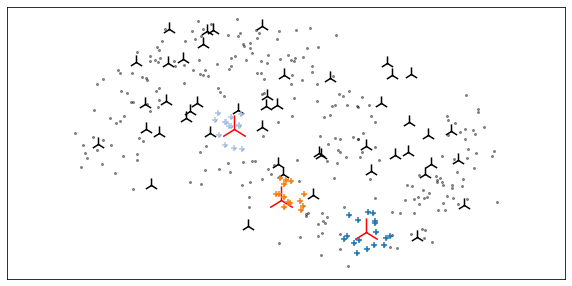

In [3]:
opt_facilities_indices = list(mcmclp.result.solution.keys())
opt_facilities = facilities[opt_facilities_indices]
other_facilities = np.delete(facilities, [opt_facilities_indices], axis=0)

utils.plot_result(points, mcmclp.result.solution, opt_facilities, other_facilities)